<a href="https://colab.research.google.com/github/ricyoung/cs689/blob/master/hw4_tf2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext tensorboard



In [0]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import datetime, os

import matplotlib.pyplot as plt

In [0]:
mnist_dataset, mnist_info = tfds.load(name = 'mnist', with_info=True, as_supervised=True)

In [4]:
print(mnist_info) 

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [0]:
# # one hot encode for 10 MNIST classes
# def my_one_hot(feature, label):
#     return feature, tf.one_hot(label, depth=10)

# # load your data from tfds
# mnist_train, train_info = tfds.load(name="mnist", with_info=True, as_supervised=True, split=tfds.Split.TRAIN)

# # convert your labels in one-hot
# mnist_train = mnist_train.map(my_one_hot)

# you can batch your data here
# mnist_train = mnist_train.batch(8)

In [0]:
# batch_size=-1 to get the full dataset in NumPy arrays from the returned tf.Tensor object


mnist_train = tfds.load(name="mnist", split=tfds.Split.TRAIN, batch_size=-1 ) 
mnist_test = tfds.load(name="mnist", split=tfds.Split.TEST, batch_size=-1)

In [0]:


# tfds.as_numpy return a generator that yields NumPy array records out of a tf.data.Dataset
mnist_train = tfds.as_numpy(mnist_train) 
mnist_test = tfds.as_numpy(mnist_test)





In [0]:
x_train, y_train = mnist_train["image"], mnist_train["label"] # seperate the x and y
x_test, y_test = mnist_test["image"], mnist_test["label"]

In [0]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
# kf = KFold(n_splits=5, shuffle=True )
# kf.get_n_splits(x_train)

In [0]:
# print(kf)

In [0]:
# This doesn't work 

# for train_index, test_index in kf.split(x_train):
#   print("TRAIN:", train_index, "TEST:", test_index) 
  # X_train, X_test =x_train[train_index], x_train[test_index]


In [0]:
#k-fold - split data index into 10parts
batch = []
for i in range (5):
    batch.append([])
    for j in range (len(x_train)):
        if j%5 == i:
            batch[i].append(x_train[j])


In [26]:
# for train_index, test_index in kf.split(x_train):
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

for i in range(len(batch)):
    print(i)

    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    #reduces to 0-1 from 0-255
    #this may not have much of a change on the output
    x_train = tf.keras.utils.normalize(x_train, axis=1)
    x_test = tf.keras.utils.normalize(x_test, axis=1)

    #Using sequential model with 2 layered neural network with each having 128 neurons
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model.compile(
        
                  # optimizer= 'adam', #95% to 99%
                  optimizer= 'SGD', # so far not as good as adam
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'] )

    
    model.fit(x_train, y_train, epochs=6)
    # epoch_loss_avg.update_state(val_loss)
    epoch_loss_avg.update_state(val_loss) 

    val_loss, val_acc = model.evaluate(x_test, y_test)
    print('training lost:', train_loss_results)

    fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
    fig.suptitle('Training Metrics')

    axes[0].set_ylabel("Loss", fontsize=14)
    axes[0].plot(train_loss_results)

    axes[1].set_ylabel("Accuracy", fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].plot(train_accuracy_results)
    # plt.show()

    print(val_acc, val_loss)



SyntaxError: ignored

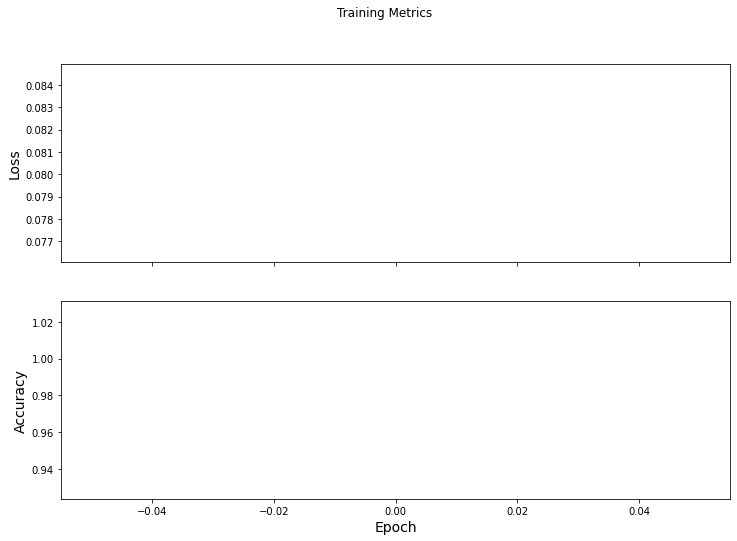

In [17]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(val_loss)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(val_acc)
plt.show()

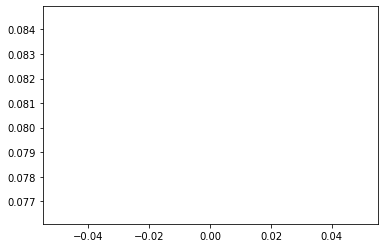

In [15]:
import matplotlib.pyplot as plt
plt.plot(val_loss)

In [14]:
%load_ext tensorboard.notebook
%tensorboard --logdir {logs_base_dir}

RuntimeError: ignored